# COMP402
Code used for Honour's Project Course

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Extrct genotypes

In [2]:
f_genotypes = "no_header_1KGP_40samples.1838.Alu.polyTE.benchmark.recode.txt"

df_g = pd.read_csv(f_genotypes, sep='\t')
df_g

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,HG00129,...,NA18500,NA18532,NA18863,NA19122,NA19474,NA19653,NA19734,NA19775,NA20810,NA20850
0,chr1,1530547,HGSV_233,N,<DEL>,907.0,PASS,END=1530850;SVTYPE=DEL;CHR2=chr1;SVLEN=-303;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:71:0:999:0:999:PE,SR",...,0/1:99:2:138:0:999:1:655:SR,"0/0:99:4:1:0:999:0:999:PE,SR","0/1:99:1:44:0:1:1:263:RD,SR","0/1:1:1:59:0:24:1:1:RD,SR","0/1:99:1:88:1:1:1:113:RD,PE,SR",0/1:99:2:90:0:1:1:515:SR,0/1:99:2:1:0:1:1:347:SR,"0/0:99:4:101:0:999:0:999:PE,SR","0/0:99:3:98:0:999:0:999:PE,SR","0/0:99:2:49:0:999:0:999:RD,PE,SR"
1,chr1,2994984,HGSV_432,N,<DEL>,999.0,PASS,END=2995286;SVTYPE=DEL;CHR2=chr1;SVLEN=-302;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:10:0:999:0:999:PE,SR",...,"0/0:99:2:31:0:999:0:999:RD,PE,SR","0/1:99:1:84:0:23:1:382:RD,SR","0/1:99:1:111:0:27:1:922:RD,SR",0/1:99:2:16:0:1:1:922:SR,"1/1:99:0:112:1:1:2:439:RD,PE,SR","0/0:99:2:113:0:999:0:999:RD,PE,SR","0/1:99:1:124:0:1:1:948:RD,SR","0/0:99:2:151:0:999:0:999:RD,PE,SR","0/0:99:2:66:0:999:0:999:RD,PE,SR","0/0:99:2:71:0:999:0:999:RD,PE,SR"
2,chr1,4095099,HGSV_558,N,<DEL>,999.0,PASS,END=4095400;SVTYPE=DEL;CHR2=chr1;SVLEN=-301;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:2:97:0:999:0:999:RD,PE,SR",...,"0/1:99:1:121:0:1:1:900:RD,SR","0/0:99:2:76:0:999:0:34:RD,PE,SR","0/1:99:1:111:0:27:1:213:RD,SR","0/0:99:2:76:0:999:0:999:RD,PE,SR","1/1:99:0:101:0:1:2:591:RD,SR","0/0:99:2:117:0:999:0:33:RD,PE,SR","0/1:99:1:124:0:1:1:898:RD,SR","0/0:99:2:97:0:999:0:999:RD,PE,SR","0/0:99:2:41:0:999:0:1:RD,PE,SR","0/0:99:2:112:0:999:0:999:RD,PE,SR"
3,chr1,4211149,HGSV_574,N,<DEL>,999.0,PASS,END=4211420;SVTYPE=DEL;CHR2=chr1;SVLEN=-271;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:102:0:999:0:999:PE,SR",...,"0/0:99:2:79:0:999:0:999:RD,PE,SR","0/0:99:3:69:0:999:0:999:PE,SR","0/0:99:3:125:0:999:0:999:PE,SR","0/0:99:2:9:0:999:0:999:RD,PE,SR","0/0:99:2:106:0:999:0:999:RD,PE,SR","0/0:99:3:54:0:999:0:999:PE,SR","0/0:99:3:10:0:999:0:999:PE,SR","0/0:99:3:143:0:999:0:999:PE,SR","0/0:99:3:44:0:999:0:999:PE,SR","0/0:99:3:96:0:999:0:999:PE,SR"
4,chr1,6669214,HGSV_798,N,<DEL>,36.0,PASS,END=6669525;SVTYPE=DEL;CHR2=chr1;SVLEN=-311;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:10:0:999:0:29:PE,SR",...,"0/0:99:2:22:0:999:0:999:RD,PE,SR","0/0:99:3:69:0:999:0:34:PE,SR","0/0:99:2:29:0:999:0:999:RD,PE,SR","0/0:99:2:89:0:999:0:999:RD,PE,SR","0/0:99:2:106:0:999:0:999:RD,PE,SR","0/0:99:3:1:0:999:0:999:PE,SR","0/0:99:2:144:0:999:0:999:RD,PE,SR","0/0:99:3:90:0:999:0:999:PE,SR","0/0:99:2:62:0:999:0:999:RD,PE,SR","0/0:99:2:12:0:999:0:999:RD,PE,SR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX,139302751,HGSV_257109,N,<DEL>,999.0,PASS,END=139303060;SVTYPE=DEL;CHR2=chrX;SVLEN=-309;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/1:1:1:11:1:1:1:1:RD,PE,SR",...,"0/1:99:1:131:0:1:1:557:RD,SR","1/1:99:1:60:1:1:2:689:RD,PE,SR","0/1:99:1:112:0:4:1:922:RD,SR","1/1:38:1:41:1:1:2:38:RD,PE,SR","1/1:99:1:22:1:1:2:845:RD,PE,SR",0/1:1:2:85:0:22:1:1:SR,0/1:99:2:113:0:22:1:496:SR,"1/1:99:1:52:1:1:2:999:RD,PE,SR","0/1:99:1:41:1:1:1:565:RD,PE,SR","0/1:99:1:122:0:1:1:446:RD,SR"
1833,chrX,139859819,HGSV_257145,N,<DEL>,999.0,PASS,END=139860126;SVTYPE=DEL;CHR2=chrX;SVLEN=-307;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:1:119:0:999:0:999:PE,SR",...,"0/1:99:1:1:0:1:1:363:RD,SR","0/0:99:2:23:0:999:0:999:RD,PE,SR","0/1:99:1:1:0:1:1:364:RD,SR","1/1:99:0:76:0:999:3:565:RD,SR","0/1:99:1:88:0:4:1:973:RD,SR","0/0:99:2:29:0:999:0:999:RD,PE,SR",1/1:99:1:92:0:22:2:746:SR,"0/0:99:2:90:0:999:0:999:RD,PE,SR","0/0:99:1:34:0:999:0:999:PE,SR","0/0:99:1:103:0:999:0:999:PE,SR"
1834,chrX,144761767,HGSV_257452,N,<DEL>,999.0,PASS,END=144762060;SVTYPE=DEL;CHR2=chrX;SVLEN=-293;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:1:94:0:999:0:999:PE,SR",...,"0/0:99:1:107:0:999:0:999:PE,SR","0/0:99:3:1:0:999:0:999:PE,SR","0/0:99:2:9:0:999:0:999:RD,PE,SR","

In [3]:
df_g.columns

Index(['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'HG00129', 'HG00131', 'HG00150', 'HG00262', 'HG00615', 'HG00672',
       'HG01067', 'HG01353', 'HG01398', 'HG01774', 'HG02004', 'HG02080',
       'HG02136', 'HG02221', 'HG02275', 'HG02406', 'HG02409', 'HG02524',
       'HG02589', 'HG02667', 'HG02794', 'HG03305', 'HG03557', 'HG03772',
       'HG03902', 'HG03951', 'HG04131', 'HG04142', 'HG04227', 'NA12287',
       'NA18500', 'NA18532', 'NA18863', 'NA19122', 'NA19474', 'NA19653',
       'NA19734', 'NA19775', 'NA20810', 'NA20850'],
      dtype='object')

In [4]:
discard_list = df_g.columns.tolist()[2:7]
print("discard_list:",discard_list)
for discard in discard_list:
    del df_g[discard]
df_g

discard_list: ['ID', 'REF', 'ALT', 'QUAL', 'FILTER']


,#CHROM,POS,INFO,FORMAT,HG00129,HG00131,HG00150,HG00262,HG00615,HG00672,...,NA18500,NA18532,NA18863,NA19122,NA19474,NA19653,NA19734,NA19775,NA20810,NA20850
0,chr1,1530547,END=1530850;SVTYPE=DEL;CHR2=chr1;SVLEN=-303;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:71:0:999:0:999:PE,SR","0/0:99:4:122:0:999:0:999:PE,SR","0/0:99:4:43:0:999:0:999:PE,SR","0/0:99:3:133:0:999:0:999:PE,SR",0/1:72:2:111:0:3:1:72:SR,0/1:1:2:75:0:27:1:1:SR,...,0/1:99:2:138:0:999:1:655:SR,"0/0:99:4:1:0:999:0:999:PE,SR","0/1:99:1:44:0:1:1:263:RD,SR","0/1:1:1:59:0:24:1:1:RD,SR","0/1:99:1:88:1:1:1:113:RD,PE,SR",0/1:99:2:90:0:1:1:515:SR,0/1:99:2:1:0:1:1:347:SR,"0/0:99:4:101:0:999:0:999:PE,SR","0/0:99:3:98:0:999:0:999:PE,SR","0/0:99:2:49:0:999:0:999:RD,PE,SR"
1,chr1,2994984,END=2995286;SVTYPE=DEL;CHR2=chr1;SVLEN=-302;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:10:0:999:0:999:PE,SR","0/0:99:1:73:0:999:0:999:PE,SR","0/0:99:2:68:0:999:0:999:RD,PE,SR","0/0:99:2:1:0:999:0:999:RD,PE,SR","0/0:99:2:10:0:999:0:999:RD,PE,SR","1/1:99:0:112:1:1:2:596:RD,PE,SR",...,"0/0:99:2:31:0:999:0:999:RD,PE,SR","0/1:99:1:84:0:23:1:382:RD,SR","0/1:99:1:111:0:27:1:922:RD,SR",0/1:99:2:16:0:1:1:922:SR,"1/1:99:0:112:1:1:2:439:RD,PE,SR","0/0:99:2:113:0:999:0:999:RD,PE,SR","0/1:99:1:124:0:1:1:948:RD,SR","0/0:99:2:151:0:999:0:999:RD,PE,SR","0/0:99:2:66:0:999:0:999:RD,PE,SR","0/0:99:2:71:0:999:0:999:RD,PE,SR"
2,chr1,4095099,END=4095400;SVTYPE=DEL;CHR2=chr1;SVLEN=-301;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:2:97:0:999:0:999:RD,PE,SR","0/1:99:1:128:1:1:1:314:RD,PE,SR","0/0:99:2:123:0:999:0:999:RD,PE,SR","0/0:99:2:112:0:999:0:999:RD,PE,SR","0/1:99:1:70:0:999:1:460:RD,SR","0/0:99:2:44:0:999:0:999:RD,PE,SR",...,"0/1:99:1:121:0:1:1:900:RD,SR","0/0:99:2:76:0:999:0:34:RD,PE,SR","0/1:99:1:111:0:27:1:213:RD,SR","0/0:99:2:76:0:999:0:999:RD,PE,SR","1/1:99:0:101:0:1:2:591:RD,SR","0/0:99:2:117:0:999:0:33:RD,PE,SR","0/1:99:1:124:0:1:1:898:RD,SR","0/0:99:2:97:0:999:0:999:RD,PE,SR","0/0:99:2:41:0:999:0:1:RD,PE,SR","0/0:99:2:112:0:999:0:999:RD,PE,SR"
3,chr1,4211149,END=4211420;SVTYPE=DEL;CHR2=chr1;SVLEN=-271;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:102:0:999:0:999:PE,SR","0/0:99:3:1:0:999:0:999:PE,SR","0/0:99:2:25:0:999:0:999:RD,PE,SR","0/0:99:2:110:0:999:0:999:RD,PE,SR","0/0:99:2:28:0:999:0:999:RD,PE,SR","0/0:99:2:16:0:999:0:999:RD,PE,SR",...,"0/0:99:2:79:0:999:0:999:RD,PE,SR","0/0:99:3:69:0:999:0:999:PE,SR","0/0:99:3:125:0:999:0:999:PE,SR","0/0:99:2:9:0:999:0:999:RD,PE,SR","0/0:99:2:106:0:999:0:999:RD,PE,SR","0/0:99:3:54:0:999:0:999:PE,SR","0/0:99:3:10:0:999:0:999:PE,SR","0/0:99:3:143:0:999:0:999:PE,SR","0/0:99:3:44:0:999:0:999:PE,SR","0/0:99:3:96:0:999:0:999:PE,SR"
4,chr1,6669214,END=6669525;SVTYPE=DEL;CHR2=chr1;SVLEN=-311;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/0:99:3:10:0:999:0:29:PE,SR","0/0:99:2:147:0:999:0:999:RD,PE,SR","0/0:99:2:134:0:999:0:999:RD,PE,SR","0/0:99:2:143:0:999:0:999:RD,PE,SR","0/0:99:2:115:0:999:0:999:RD,PE,SR","0/0:99:2:130:0:999:0:999:RD,PE,SR",...,"0/0:99:2:22:0:999:0:999:RD,PE,SR","0/0:99:3:69:0:999:0:34:PE,SR","0/0:99:2:29:0:999:0:999:RD,PE,SR","0/0:99:2:89:0:999:0:999:RD,PE,SR","0/0:99:2:106:0:999:0:999:RD,PE,SR","0/0:99:3:1:0:999:0:999:PE,SR","0/0:99:2:144:0:999:0:999:RD,PE,SR","0/0:99:3:90:0:999:0:999:PE,SR","0/0:99:2:62:0:999:0:999:RD,PE,SR","0/0:99:2:12:0:999:0:999:RD,PE,SR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX,139302751,END=139303060;SVTYPE=DEL;CHR2=chrX;SVLEN=-309;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,"0/1:1:1:11:1:1:1:1:RD,PE,SR","0/1:99:1:1:0:3:1:606:RD,SR","1/1:99:1:116:1:1:2:417:RD,PE,SR","0/1:99:1:94:1:1:1:753:RD,PE,SR","1/1:99:1:95:1:1:2:218:RD,PE,SR","0/1:99:2:1:1:1:1:746:PE,SR",...,"0/1:99:1:131:0:1:1:557:RD,SR","1/1:99:1:60:1:1:2:689:RD,PE,SR","0/1:99:1:112:0:4:1:922:RD,SR","1/1:38:1:41:1:1:2:38:RD,PE,SR","1/1:99:1:22:1:1:2:845:RD,PE,SR",0/1:1:2:85:0:22:1:1:SR,0/1:99:2:113:0:22:1:496:SR,"1/1:99:1:52:1:1:2:999:RD,PE,SR

In [5]:
HG_list = df_g.columns.tolist()[4:]
for sample in HG_list:
    df_g[sample] = df_g[sample].str.split(":", expand=True)[0]
df_g

,#CHROM,POS,INFO,FORMAT,HG00129,HG00131,HG00150,HG00262,HG00615,HG00672,...,NA18500,NA18532,NA18863,NA19122,NA19474,NA19653,NA19734,NA19775,NA20810,NA20850
0,chr1,1530547,END=1530850;SVTYPE=DEL;CHR2=chr1;SVLEN=-303;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/1,0/1,...,0/1,0/0,0/1,0/1,0/1,0/1,0/1,0/0,0/0,0/0
1,chr1,2994984,END=2995286;SVTYPE=DEL;CHR2=chr1;SVLEN=-302;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/0,1/1,...,0/0,0/1,0/1,0/1,1/1,0/0,0/1,0/0,0/0,0/0
2,chr1,4095099,END=4095400;SVTYPE=DEL;CHR2=chr1;SVLEN=-301;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/1,0/0,0/0,0/1,0/0,...,0/1,0/0,0/1,0/0,1/1,0/0,0/1,0/0,0/0,0/0
3,chr1,4211149,END=4211420;SVTYPE=DEL;CHR2=chr1;SVLEN=-271;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
4,chr1,6669214,END=6669525;SVTYPE=DEL;CHR2=chr1;SVLEN=-311;AL...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832,chrX,139302751,END=139303060;SVTYPE=DEL;CHR2=chrX;SVLEN=-309;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/1,0/1,1/1,0/1,1/1,0/1,...,0/1,1/1,0/1,1/1,1/1,0/1,0/1,1/1,0/1,0/1
1833,chrX,139859819,END=139860126;SVTYPE=DEL;CHR2=chrX;SVLEN=-307;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/0,0/1,...,0/1,0/0,0/1,1/1,0/1,0/0,1/1,0/0,0/0,0/0
1834,chrX,144761767,END=144762060;SVTYPE=DEL;CHR2=chrX;SVLEN=-293;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/0,0/0,0/0,0/0,0/1,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1835,chrX,146248394,END=146248692;SVTYPE=DEL;CHR2=chrX;SVLEN=-298;...,GT:GQ:RD_CN:RD_GQ:PE_GT:PE_GQ:SR_GT:SR_GQ:EV,0/0,0/1,0/1,0/0,0/1,1/1,...,0/1,1/1,0/0,1/1,0/1,1/1,0/1,0/0,0/1,0/0


In [6]:
print(['locus', 'position', 'end', 'sample', 'genotype', 'REF_grey_reads',
       'ALT_grey_reads', 'TOTAL-grey_reads', 'REF_grey_reads_in_pair',
       'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair', 'REF_bkpt_r', 'REF_bkpt_l',
       'ALT_bkpt', 'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment'] == ['locus', 'position', 'end', 'sample', "genotype", 'REF_grey_reads',
       'ALT_grey_reads', 'TOTAL-grey_reads', 'REF_grey_pairs',
       'ALT_grey_pairs', 'Total_grey_pairs', 'REF_bkpt_r', 'REF_bkpt_l',
       'ALT_bkpt', 'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment'])

print(len(['locus', 'position', 'end', 'sample', "genotype", 'REF_grey_reads',
       'ALT_grey_reads', 'TOTAL-grey_reads', 'REF_grey_reads_in_pair',
       'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair', 'REF_bkpt_r', 'REF_bkpt_l',
       'ALT_bkpt', 'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment']))

False
17


### Manipulate files

In [7]:
# Create a list of samples to work with
samples_list = ["HG00129", "HG00150", "HG00262","HG00615", "HG00672"]

df = pd.DataFrame(columns=['locus', 'position', 'end', 'sample', "genotype", 'REF_grey_reads',
       'ALT_grey_reads', 'TOTAL-grey_reads', 'REF_grey_reads_in_pair',
       'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair', 'REF_bkpt_r', 'REF_bkpt_l',
       'ALT_bkpt', 'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment'])

for sample in samples_list:
    print("sample!!!!: ", sample)
    f_features = "features0408/" + sample + "_features_0408.txt"
    # print(f_features)
    colnames = ["locus",
                  "REF_grey_reads", "ALT_grey_reads", "TOTAL-grey_reads" ,
                  'REF_grey_reads_in_pair', 'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair',
                  "REF_bkpt_r", "REF_bkpt_l", "ALT_bkpt",
                  "REF_fragment_l", "REF_fragment_r", "ALT_fragment"]
    df_f = pd.read_csv(f_features, sep=',', names=colnames)
    df_f[["locus", "position"]] = df_f["locus"].str.split(":", 1, expand=True)
    
    #Move last column to first column
    new_cols =  ["locus", "position",
                      "REF_grey_reads", "ALT_grey_reads", "TOTAL-grey_reads" ,
                      'REF_grey_reads_in_pair', 'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair',
                      "REF_bkpt_r", "REF_bkpt_l", "ALT_bkpt",
                      "REF_fragment_l", "REF_fragment_r", "ALT_fragment"]
    df_f = df_f.reindex(columns=new_cols)
    
    # Sort the feature df
    df_f = df_f.sort_values(["locus", "position"], ascending=["True","True"])
    
    df_f[["position", "end"]] = df_f["position"].str.split("-", 1, expand=True)
    #Move last column to first column
    new_cols =  ["locus", "position", "end",
                      "REF_grey_reads", "ALT_grey_reads", "TOTAL-grey_reads" ,
                      'REF_grey_reads_in_pair', 'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair',
                      "REF_bkpt_r", "REF_bkpt_l", "ALT_bkpt",
                      "REF_fragment_l", "REF_fragment_r", "ALT_fragment"]
    df_f = df_f.reindex(columns=new_cols)
    
    # Sort the feature df
    df_f.position = df_f.position.astype(int)
    df_f = df_f.sort_values(["locus", "position"], ascending=["True","True"])
    
    # Sort the genotypes df
    df_g.POS = df_g.POS.astype(int)
    df_g = df_g.sort_values(["#CHROM", "POS"], ascending=["True", "True"])
    
    df_f = df_f.reset_index(drop=True)
    
    df_g_f = pd.concat([df_g, df_f], axis=1)
    
    df_g_f.iloc[:, -12:] = df_g_f.iloc[:, -12:].astype(int)
    
    HG_NA_list = df_g_f.columns.to_list()[4:-15]
    # print(HG_NA_list)
    for HG_NA in HG_NA_list:
        df_g_f[HG_NA] = df_g_f[HG_NA].map({"0/0":0,
                                 "0/1":1,
                                 "1/1":2,
                                 "./.":3,
                                 np.nan:4},
                                 na_action=None)
        
    df_g_f['sample'] = sample
    
    print(df_g_f)
        
    df_sample = df_g_f[['locus', 'position', 'end', sample, 
    'REF_grey_reads','ALT_grey_reads', 'TOTAL-grey_reads', 
    'REF_grey_reads_in_pair', 'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair',
    'REF_bkpt_r', 'REF_bkpt_l','ALT_bkpt',
    'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment', 'sample']]
    df_sample = df_sample.rename(columns={sample:'genotype'})
    df_sample["genotype"] = df_sample["genotype"].astype(int)
    #print("df_sample")
    #print(df_sample)
    
    df_balanced = pd.DataFrame(columns=['locus', 'position', 'end', 'sample', 'genotype', 
        'REF_grey_reads','ALT_grey_reads', 'TOTAL-grey_reads', 
        'REF_grey_reads_in_pair', 'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair',
        'REF_bkpt_r', 'REF_bkpt_l','ALT_bkpt', 'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment'])
    for i in range(3):
        # df_sampled = df[df["genotype"] == i].sample(n=3)
        df_balanced = pd.concat([df_balanced, df_sample[df_sample["genotype"] == i].sample(n=370)]) ## Change 400 as necessary
    
        #HG129: 30 30 30
        #HG615: 40 40 40
        
    df = pd.concat([df, df_balanced])    
    print("df dim:", df.shape)

sample!!!!:  HG00129
     #CHROM        POS                                               INFO  \
0      chr1    1530547  END=1530850;SVTYPE=DEL;CHR2=chr1;SVLEN=-303;AL...   
1      chr1    2994984  END=2995286;SVTYPE=DEL;CHR2=chr1;SVLEN=-302;AL...   
2      chr1    4095099  END=4095400;SVTYPE=DEL;CHR2=chr1;SVLEN=-301;AL...   
3      chr1    4211149  END=4211420;SVTYPE=DEL;CHR2=chr1;SVLEN=-271;AL...   
4      chr1    6669214  END=6669525;SVTYPE=DEL;CHR2=chr1;SVLEN=-311;AL...   
...     ...        ...                                                ...   
1832   chrX  139302751  END=139303060;SVTYPE=DEL;CHR2=chrX;SVLEN=-309;...   
1833   chrX  139859819  END=139860126;SVTYPE=DEL;CHR2=chrX;SVLEN=-307;...   
1834   chrX  144761767  END=144762060;SVTYPE=DEL;CHR2=chrX;SVLEN=-293;...   
1835   chrX  146248394  END=146248692;SVTYPE=DEL;CHR2=chrX;SVLEN=-298;...   
1836   chrX  146445001  END=146445301;SVTYPE=DEL;CHR2=chrX;SVLEN=-300;...   

                                            FORMAT  HG

     #CHROM        POS                                               INFO  \
0      chr1    1530547  END=1530850;SVTYPE=DEL;CHR2=chr1;SVLEN=-303;AL...   
1      chr1    2994984  END=2995286;SVTYPE=DEL;CHR2=chr1;SVLEN=-302;AL...   
2      chr1    4095099  END=4095400;SVTYPE=DEL;CHR2=chr1;SVLEN=-301;AL...   
3      chr1    4211149  END=4211420;SVTYPE=DEL;CHR2=chr1;SVLEN=-271;AL...   
4      chr1    6669214  END=6669525;SVTYPE=DEL;CHR2=chr1;SVLEN=-311;AL...   
...     ...        ...                                                ...   
1832   chrX  139302751  END=139303060;SVTYPE=DEL;CHR2=chrX;SVLEN=-309;...   
1833   chrX  139859819  END=139860126;SVTYPE=DEL;CHR2=chrX;SVLEN=-307;...   
1834   chrX  144761767  END=144762060;SVTYPE=DEL;CHR2=chrX;SVLEN=-293;...   
1835   chrX  146248394  END=146248692;SVTYPE=DEL;CHR2=chrX;SVLEN=-298;...   
1836   chrX  146445001  END=146445301;SVTYPE=DEL;CHR2=chrX;SVLEN=-300;...   

                                            FORMAT  HG00129  HG00131  HG001

df dim: (4440, 17)
sample!!!!:  HG00672
     #CHROM        POS                                               INFO  \
0      chr1    1530547  END=1530850;SVTYPE=DEL;CHR2=chr1;SVLEN=-303;AL...   
1      chr1    2994984  END=2995286;SVTYPE=DEL;CHR2=chr1;SVLEN=-302;AL...   
2      chr1    4095099  END=4095400;SVTYPE=DEL;CHR2=chr1;SVLEN=-301;AL...   
3      chr1    4211149  END=4211420;SVTYPE=DEL;CHR2=chr1;SVLEN=-271;AL...   
4      chr1    6669214  END=6669525;SVTYPE=DEL;CHR2=chr1;SVLEN=-311;AL...   
...     ...        ...                                                ...   
1832   chrX  139302751  END=139303060;SVTYPE=DEL;CHR2=chrX;SVLEN=-309;...   
1833   chrX  139859819  END=139860126;SVTYPE=DEL;CHR2=chrX;SVLEN=-307;...   
1834   chrX  144761767  END=144762060;SVTYPE=DEL;CHR2=chrX;SVLEN=-293;...   
1835   chrX  146248394  END=146248692;SVTYPE=DEL;CHR2=chrX;SVLEN=-298;...   
1836   chrX  146445001  END=146445301;SVTYPE=DEL;CHR2=chrX;SVLEN=-300;...   

                                   

In [8]:
df

,locus,position,end,sample,genotype,REF_grey_reads,ALT_grey_reads,TOTAL-grey_reads,REF_grey_reads_in_pair,ALT_grey_reads_in_pair,Total_grey_reads_in_pair,REF_bkpt_r,REF_bkpt_l,ALT_bkpt,REF_fragment_l,REF_fragment_r,ALT_fragment
1667,chr8,91699962,91700304,HG00129,0,160,1,161,148,0,148,25,34,0,40,45,0
1149,chr4,90461049,90461377,HG00129,0,144,1,145,126,0,126,22,32,1,35,36,0
188,chr10,102885491,102885839,HG00129,0,110,1,111,96,0,96,7,29,0,15,34,0
1817,chrX,96751638,96751966,HG00129,0,29,1,30,26,0,26,5,4,0,5,7,0
353,chr12,94343462,94343806,HG00129,0,105,0,105,91,0,91,6,37,0,14,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,chr17,71855999,71856340,HG00672,2,2,53,55,2,50,52,0,0,29,0,0,25
995,chr3,26745215,26745548,HG00672,2,1,52,53,0,52,52,0,0,27,0,0,26
1232,chr4,180628276,180628601,HG00672,2,0,70,70,0,68,68,0,0,38,0,0,34
1536,chr7,42565024,42565380,HG00672,2,0,52,52,0,50,50,0,0,27,0,0,25


In [9]:
df.to_csv("HG00129-615-672_12features_0413.csv", index=False)

In [10]:
df[df["ALT_fragment"] == 1]

,locus,position,end,sample,genotype,REF_grey_reads,ALT_grey_reads,TOTAL-grey_reads,REF_grey_reads_in_pair,ALT_grey_reads_in_pair,Total_grey_reads_in_pair,REF_bkpt_r,REF_bkpt_l,ALT_bkpt,REF_fragment_l,REF_fragment_r,ALT_fragment
377,chr12,132221062,132221379,HG00129,0,61,2,63,54,2,56,12,4,1,17,10,1
186,chr10,96777391,96777708,HG00129,0,140,4,144,132,2,134,29,18,2,39,34,1
266,chr11,74821360,74821697,HG00129,0,154,2,156,142,2,144,29,19,1,40,39,1
647,chr18,828472,828806,HG00129,1,17,6,23,8,2,10,5,5,4,0,3,1
1223,chr4,169887294,169887581,HG00129,1,59,2,61,48,2,50,18,14,1,19,10,1
737,chr19,46452843,46453154,HG00129,1,1,3,4,0,2,2,0,0,2,0,0,1
1423,chr6,54851943,54852085,HG00129,1,41,2,43,38,2,40,8,17,1,14,17,1
759,chr2,28131075,28131391,HG00129,1,4,3,7,0,2,2,0,0,2,0,0,1
534,chr15,52232985,52233322,HG00129,2,4,2,6,4,2,6,1,1,0,2,2,1
1464,chr6,107944918,107945231,HG00129,2,10,2,12,6,2,8,0,5,1,2,2,1


In [11]:
df["ALT_fragment"].value_counts(sort=False)

0     1930
1       53
2       19
3       12
4       27
5       21
6       62
7       73
8       84
9      130
10     146
11     158
12     154
13     173
14     150
15     130
16     125
17     126
18     124
19     135
20     122
21     128
22     149
23     135
24     131
25     125
26     146
27     119
28     117
29     103
30      82
31      74
32      63
33      51
34      36
35      34
36      29
37      21
38      10
39      16
40       6
41       8
42       5
43       4
44       1
46       3
Name: ALT_fragment, dtype: int64

In [12]:
df.to_csv("HG00129-615-672_12features.csv", index=False)

### Specify the sample(s) to work with! 

In [13]:
y = df["genotype"].astype(int).to_numpy()
print(y)
print(y.shape)
X = df.iloc[:, 5:].astype(int).to_numpy()
print(X)
print(X.shape)

[0 0 0 ... 2 2 2]
(5550,)
[[160   1 161 ...  40  45   0]
 [144   1 145 ...  35  36   0]
 [110   1 111 ...  15  34   0]
 ...
 [  0  70  70 ...   0   0  34]
 [  0  52  52 ...   0   0  25]
 [  1  68  69 ...   0   0  32]]
(5550, 12)


### A function for plotting the importance of features

In [14]:
features_names = ['REF_grey_reads','ALT_grey_reads', 'TOTAL-grey_reads',
                 'REF_grey_reads_in_pair', 'ALT_grey_reads_in_pair', 'Total_grey_reads_in_pair',
                  'REF_bkpt_r', 'REF_bkpt_l', 'ALT_bkpt',
                  'REF_fragment_l', 'REF_fragment_r', 'ALT_fragment']

#features_names = ['REF_fragment_l', 'REF_fragment_r', 'ALT_fragment']


## May need to be careful
def feature_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

## Logistic regression

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
X_train

array([[114,   0, 114, ...,  18,  35,   0],
       [ 70,  29,  99, ...,  18,  17,  13],
       [146,   0, 146, ...,  32,  44,   0],
       ...,
       [115,   0, 115, ...,  32,  33,   0],
       [  4,  53,  57, ...,   0,   0,  25],
       [108,   0, 108, ...,  32,  23,   0]])

In [16]:
# To generate the same test set every time, set "random_state=42"
# Normalizing data
mean = X_train.mean(axis=0) ## 
std = X_train.std(axis=0)  ## 

X_train = (X_train - mean) / std ##
X_test = (X_test - mean) / std  ## 

In [17]:
clf_logi = LogisticRegression(penalty="l2", random_state=0).fit(X_train, y_train)
y_pred = clf_logi.predict(X_test)

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[360   3   0]
 [ 12 321  55]
 [  2  32 325]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       363
           1       0.90      0.83      0.86       388
           2       0.86      0.91      0.88       359

    accuracy                           0.91      1110
   macro avg       0.91      0.91      0.91      1110
weighted avg       0.91      0.91      0.91      1110

0.9063063063063063
[[0.99173554 0.00826446 0.        ]
 [0.03092784 0.82731959 0.14175258]
 [0.00557103 0.08913649 0.90529248]]


<AxesSubplot:>

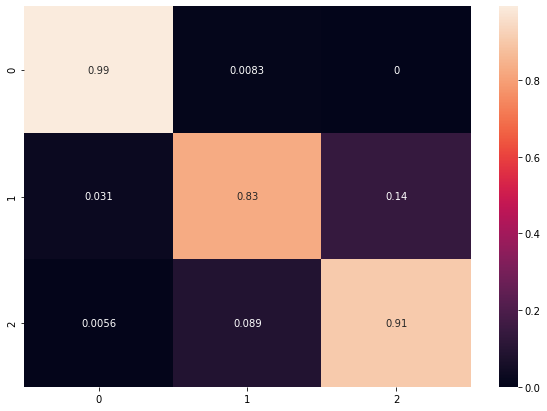

In [18]:
cnf_mtx = confusion_matrix(y_test,y_pred)
print(cnf_mtx)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

norm_conf_mtx = cnf_mtx / cnf_mtx.sum(axis=1, keepdims=True)
print(norm_conf_mtx)
df_cm = pd.DataFrame(norm_conf_mtx)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True) ## Try to show more digits

[[ 1.59263352 -2.41571209  0.81030497  0.53090236 -2.28980544 -0.66802185
   0.35922604  0.25677417 -2.22763493 -0.12013088  0.16023019 -2.30579932]
 [-0.67169663  0.69518504 -0.53970002  0.22127362  1.04051097  0.96660959
  -0.14323761 -0.11324445  0.56952469  0.00387393 -0.22484681  0.89306034]
 [-0.92093688  1.72052705 -0.27060494 -0.75217598  1.24929446 -0.29858773
  -0.21598843 -0.14352972  1.65811023  0.11625695  0.06461661  1.41273898]]


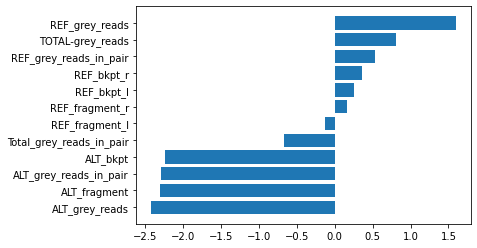

In [19]:
print(clf_logi.coef_)
feature_importances(clf_logi.coef_[0], features_names)

In [20]:
# 5-fold cross-validation
scores_logi = cross_val_score(clf_logi, X_train, y_train, cv=5)
print(scores_logi.mean())

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

0.9072072072072072


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest

1200 * 40

In [21]:
clf_rf = RandomForestClassifier(n_estimators=20, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

[[361   1   1]
 [ 10 346  32]
 [  4  29 326]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       363
           1       0.92      0.89      0.91       388
           2       0.91      0.91      0.91       359

    accuracy                           0.93      1110
   macro avg       0.93      0.93      0.93      1110
weighted avg       0.93      0.93      0.93      1110

0.9306306306306307


<AxesSubplot:>

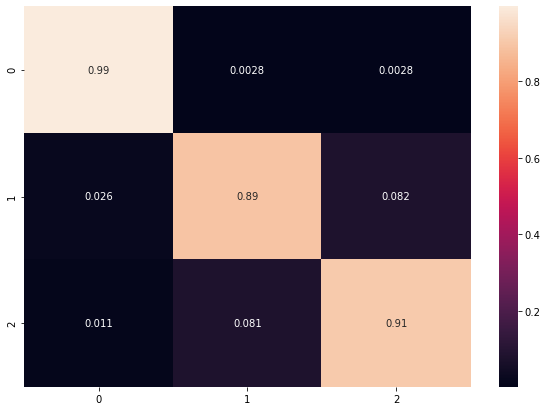

In [22]:
cnf_mtx = confusion_matrix(y_test,y_pred)
print(cnf_mtx)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

norm_conf_mtx = cnf_mtx / cnf_mtx.sum(axis=1, keepdims=True)
df_cm = pd.DataFrame(norm_conf_mtx)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [23]:
# 5-fold cross-validation
scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=5)
print(scores_rf.mean())

0.928153153153153


## SVM - Support Vector Machine

### Using linear (with linear boundary) as kernel

In [24]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
# 5-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())

C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

0.9004504504504505


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[[ 1.13418227 -1.64395901  0.62376454 -0.00954981 -1.93505188 -1.2213873
   0.2703111   0.24608534 -1.53231567  0.18369008  0.09288183 -2.19586584]
 [ 0.89248712 -1.02715494  0.65382404  0.07439896 -0.93549716 -0.47720315
   1.0245724   0.65362966 -0.98166269 -0.39924446 -0.11355346 -0.93556158]
 [ 0.15894023 -0.47136105 -0.05998009  0.01549801  0.04373367  0.04951228
   0.13961403 -0.03214204 -0.67832591  0.01752183 -0.04880602 -0.13949406]]


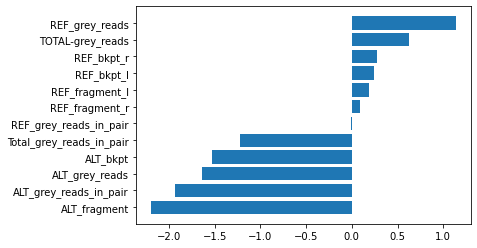

In [25]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
svm_lin = clf.fit(X_train, y_train)
print(svm_lin.coef_)
feature_importances(svm_lin.coef_[0], features_names)


y_pred = clf.predict(X_test)

[[363   0   0]
 [ 14 360  14]
 [  4  77 278]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       363
           1       0.82      0.93      0.87       388
           2       0.95      0.77      0.85       359

    accuracy                           0.90      1110
   macro avg       0.91      0.90      0.90      1110
weighted avg       0.91      0.90      0.90      1110

0.9018018018018018


<AxesSubplot:>

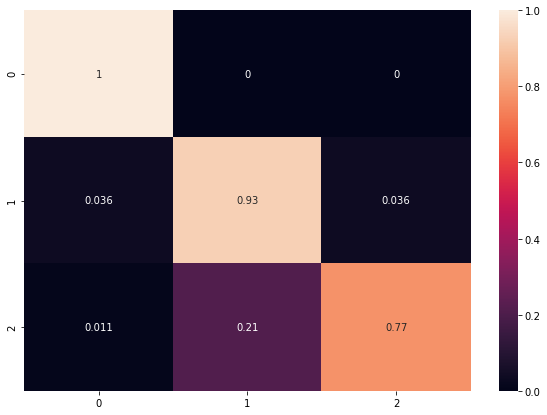

In [26]:
# Evaluate the model
cnf_mtx = confusion_matrix(y_test,y_pred)
print(cnf_mtx)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

norm_conf_mtx = cnf_mtx / cnf_mtx.sum(axis=1, keepdims=True)
df_cm = pd.DataFrame(norm_conf_mtx)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

### Using rbf (with non-linear boundary) as kernel

In [27]:
# Using kernel, rbf
clf = svm.SVC(kernel="rbf")
#clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())
#print('Accuracy of linear SVC on training set: {:.3f}'.format(clf.score(X_train, y_train)))
#print('Accuracy of linear SVC on test set: {:.3f}'.format(clf.score(X_test, y_test)))

0.9292792792792793


## MLP

In [28]:
clf = MLPClassifier(random_state=1, max_iter=300)
# 5-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())

0.936036036036036


In [29]:
clf = MLPClassifier(random_state=1, max_iter=300)
mlp = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[[355   8   0]
 [  9 351  28]
 [  2  22 335]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       363
           1       0.92      0.90      0.91       388
           2       0.92      0.93      0.93       359

    accuracy                           0.94      1110
   macro avg       0.94      0.94      0.94      1110
weighted avg       0.94      0.94      0.94      1110

0.9378378378378378


<AxesSubplot:>

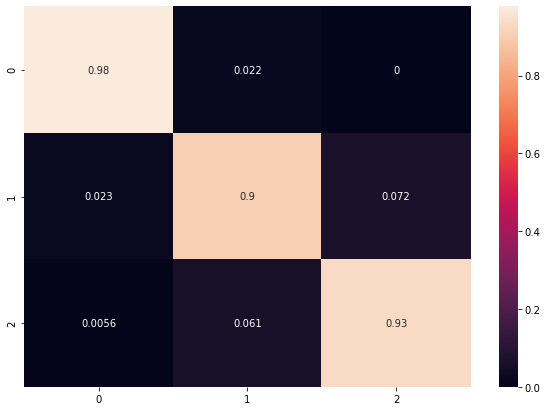

In [30]:
# Evaluate the model
cnf_mtx = confusion_matrix(y_test,y_pred)
print(cnf_mtx)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

norm_conf_mtx = cnf_mtx / cnf_mtx.sum(axis=1, keepdims=True)
df_cm = pd.DataFrame(norm_conf_mtx)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)